# Feature Scaling
Feature scaling is the process of scaling the numerical input of the data. 
## Why is scaling done ?
- To make the machine learning algorithm perform better.
- Increase efficiency of model (reduce processing time).
- Reduce the impact of different units to the model.
    - Example : weight(kg), age(years), height(cm)
- Reduce the impact of the different scales of units to the machine learning model.
    - Example: 0-100 , 0.00001 - 0.001
    
## Example of algorithms that are effected by scales of the features
- Linear regression 
- Logistic regression
- Artificial neural networks
- K-nearest neighbours
- Support Vector Machines

## Example of algorithms not effected by scales of the features
- Decision trees
- Ensembles of tress
- Random forest

#### Today we will look at 2 of the most popular methods of feature scaling : 
- **Normalization** & **Standardization**

In [4]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

### Importing data for analysis
- We are using the **Sonar Dataset**
- This dataset contains the radar returns of rocks or simulated mines
- [Sonar Dataset Description](https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.names)
- [Sonar Dataset Source](https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv)



In [5]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = pd.read_csv(url, header=None)

In [6]:
# Inspecting the dataset

In [7]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [9]:
dataset.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [10]:
dataset[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

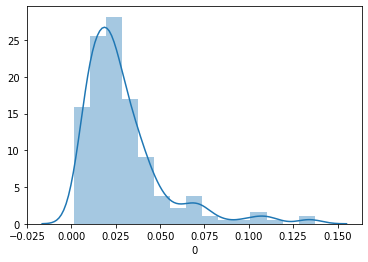

In [8]:
sns.distplot(dataset[0], bins=15)

### Performing Modelling without Normalization or Scaling 

In [11]:
X = dataset.drop([60], axis=1)
y = dataset[60]

In [12]:
X[0].head()

0    0.0200
1    0.0453
2    0.0262
3    0.0100
4    0.0762
Name: 0, dtype: float64

In [13]:
%%time
classifier = KNeighborsClassifier()  
scores = cross_val_score(classifier, X, y, cv=9)
print("Cross Validation Scores:", scores)
print("Average cross validataion score",scores.mean())

Cross Validation Scores: [0.54166667 0.82608696 0.7826087  0.82608696 0.43478261 0.60869565
 0.60869565 0.43478261 0.56521739]
Average cross validataion score 0.625402576489533
CPU times: user 53.4 ms, sys: 1.96 ms, total: 55.4 ms
Wall time: 55.5 ms


## Normalization
- This is rescaling the data in a way where the data is within a **range of 0 and 1**. 

### $$ X_{norm} = \frac{X - min(X)}{max(X) - min(X)} $$

In scikit learn the function that can be used for this is `MinMaxScaler`

In [14]:
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)

In [15]:
X_mms[0]

array([0.13643068, 0.15645092, 0.13567674, 0.03542558, 0.22495562,
       0.23757055, 0.40746753, 0.34090408, 0.4492818 , 0.28571429,
       0.1871544 , 0.19724502, 0.29566719, 0.03836238, 0.0630956 ,
       0.21483818, 0.28504818, 0.27262338, 0.48222175, 0.44317209,
       0.55554384, 0.4960638 , 0.39896153, 0.54410409, 0.6630123 ,
       0.60513272, 0.69576636, 0.80238781, 0.67441153, 0.34558432,
       0.08991826, 0.24713548, 0.48766145, 0.77742448, 0.8503631 ,
       0.84949597, 0.69330855, 0.59415618, 0.48197343, 0.28616558,
       0.01737116, 0.33919414, 0.36531747, 0.54831229, 0.37546204,
       0.19007131, 0.19032959, 0.40221623, 0.1933367 , 0.39272727,
       0.2310757 , 0.02710414, 0.15584416, 0.43567251, 0.14965986,
       0.41794872, 0.50284091, 0.18535469, 0.24517906, 0.06004619])

In [16]:
print('max',max(X_mms[0]))
print('min',min(X_mms[0]))

max 0.8503630970645394
min 0.017371163867979156


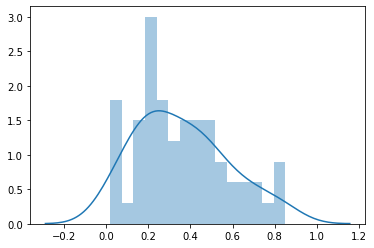

In [17]:
sns.distplot(X_mms[0], bins=15)

In [18]:
%%time
classifier = KNeighborsClassifier()  
scores = cross_val_score(classifier, X_mms, y, cv=9)
print("Cross Validation Scores:", scores)
print("Average cross validataion score",scores.mean())

Cross Validation Scores: [0.66666667 0.86956522 0.69565217 0.86956522 0.30434783 0.60869565
 0.7826087  0.47826087 0.47826087]
Average cross validataion score 0.6392914653784219
CPU times: user 45.8 ms, sys: 462 µs, total: 46.2 ms
Wall time: 44 ms


## Standard Scalar
- Here we will center the data, then divide by the standard deviation. 
- The mean will be transformed to 0 and the standard deviation will be $s_{X}$

### $$ X_{std} = \frac{X - \bar{X}}{s_{X}} $$

In scikit learn the function that can be used is  `StandardScaler`

In [19]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [20]:
X_ss[0]

array([-0.39955135, -0.04064823, -0.02692565, -0.71510513,  0.36445605,
       -0.10125288,  0.52163841,  0.29784323,  1.12527153,  0.02118591,
       -0.56738192, -0.65854108, -0.35204302, -1.41437288, -1.24041609,
       -0.65141323, -0.40291277, -0.5842021 ,  0.01161165, -0.31809184,
       -0.11959712, -0.45902868, -0.85816473, -0.49322534, -0.01769506,
       -0.24662866,  0.03364482,  0.48168725,  0.15448626, -0.8865206 ,
       -1.75089006, -0.83977659,  0.46054842,  1.52357887,  1.78380502,
        1.76803946,  1.27600761,  1.27102447,  0.84846088, -0.20651076,
       -1.39574065,  0.03033902,  0.25932835,  1.59077057,  0.44206152,
       -0.16488536, -0.20004835,  0.68858804, -0.37997825,  0.87851031,
        0.59528304, -1.11543184, -0.59760446,  0.68089736, -0.29564577,
        1.4816347 ,  1.76378447,  0.06987027,  0.17167808, -0.65894689])

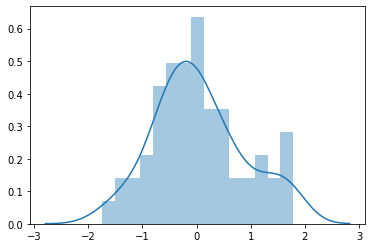

In [21]:
sns.distplot(X_ss[0], bins=15)

In [22]:
%%time
classifier = KNeighborsClassifier()  
scores = cross_val_score(classifier, X_ss, y, cv=9)
print("Cross Validation Scores:", scores)
print("Average cross validataion score",scores.mean())

Cross Validation Scores: [0.70833333 0.73913043 0.73913043 0.82608696 0.39130435 0.69565217
 0.91304348 0.56521739 0.60869565]
Average cross validataion score 0.6873993558776167
CPU times: user 41.8 ms, sys: 380 µs, total: 42.2 ms
Wall time: 39.8 ms


### Normalization or standardization ?

#### Normalize 
- When using features to train a neural network 

#### Standardization
- In most cases, it is best to standardize the features as it would allow the machine learaning model to be more efficient and accurate due to the scale being small and in a normal distribution.
- Most of other machine learning algorithms besides tree based algorithms (decision trees).

#### Exercise 1: 
Produce a  prediction model using the House price data obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv)
- What type of problem is this? Classification or Regression?
- Standardize the `train_sml` data.
- Compare the accuracy for the `train_sml` data when standardize, normalize and without any scaling.

###### Bonus 
- Test another regression model, besides linear regression.
- Submit prediction csv of the test data, and obtain the accuracy @  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submit

In [23]:
train = pd.read_csv('./Data/train_house.csv')
test = pd.read_csv('./Data/test_house.csv')

In [24]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [26]:
train_sml = train[ ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]


In [27]:
test_sml = test[ ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]


### References: 
- [Standardization Vs Normalization- Feature Scaling (video)](https://www.youtube.com/watch?v=mnKm3YP56PY&ab_channel=KrishNaik)
- [Normalizing Inputs (C2W1L09) Andrew Ng (video)](https://www.youtube.com/watch?v=FDCfw-YqWTE&ab_channel=Deeplearning.ai)
- [Machine Learning - Data Normalization - Python/ Scikit-learn](https://www.youtube.com/watch?v=YKP31T5LIXQ&ab_channel=JohannesFrey)
- [Scikit-Learn -Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#standardscaler)
- [How to Use StandardScaler and MinMaxScaler Transforms in Python](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)


Without Normalize , Standardize 

In [28]:
# import algo library

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [29]:
X_house = train_sml.drop(columns=['SalePrice'])
y_house = train_sml['SalePrice']

In [30]:
from sklearn.model_selection import train_test_split

Train , test , split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_house, y_house, test_size=0.2)

In [32]:
%%time
# Build Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

#train as input
predictions_lr = model_lr.predict(X_train)

# R-Squared Score on train data 
print("train R2", r2_score(y_train, predictions_lr))

#test as input
predictions_lr_test = model_lr.predict(X_test)
print("test R2", r2_score(y_test, predictions_lr_test))

train R2 0.7721153325835549
test R2 0.7450204321035383
CPU times: user 9.4 ms, sys: 349 µs, total: 9.75 ms
Wall time: 15.8 ms


Standardized

In [33]:
ss_ = StandardScaler()
X_house_ss = ss.fit_transform(X_house)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_house_ss, y_house, test_size=0.2)

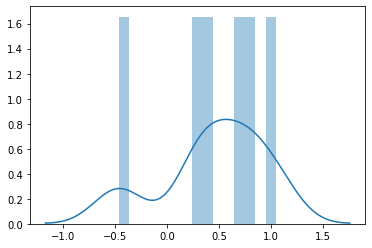

In [35]:
sns.distplot(X_house_ss[0], bins=15)

In [36]:


%%time
# Build Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

#train as input
predictions_lr = model_lr.predict(X_train)

# R-Squared Score on train data 
print("train R2", r2_score(y_train, predictions_lr))

#test as input
predictions_lr_test = model_lr.predict(X_test)
print("test R2", r2_score(y_test, predictions_lr_test))



train R2 0.7549064815872852
test R2 0.8228286660233195
CPU times: user 6.63 ms, sys: 637 µs, total: 7.26 ms
Wall time: 5.82 ms


Normalized

In [37]:
mms = MinMaxScaler()
X_house_mms = mms.fit_transform(X_house)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_house_mms, y_house, test_size=0.2)

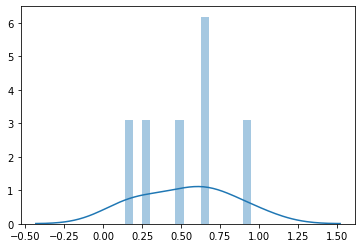

In [39]:
sns.distplot(X_house_mms[0], bins=15)

In [40]:

%%time
# Build Linear Regression Model
model_mms = LinearRegression()
model_lr.fit(X_train, y_train)

#train as input
predictions_lr = model_lr.predict(X_train)

# R-Squared Score on train data 
print("train R2", r2_score(y_train, predictions_lr))

#test as input
predictions_lr_test = model_lr.predict(X_test)
print("test R2", r2_score(y_test, predictions_lr_test))

train R2 0.7570463153535247
test R2 0.8112915212471403
CPU times: user 2.51 ms, sys: 3.7 ms, total: 6.21 ms
Wall time: 4.55 ms


KNeighborsClassifier

In [89]:

ss_house = StandardScaler()  
#scaler.fit(X_house)
X_house_ss =ss_house.fit_transform(X_house)

X_train, X_test, y_train, y_test = train_test_split(X_house_ss, y_house, test_size=0.2)



In [97]:

# tak tahu yang ni. keliru 


ss_house_2 = StandardScaler()  

X_train = ss_house_2.fit_transform(X_house)


In [93]:
#classifier = KNeighborsClassifier()  
#classifier.fit(X_train,y_house)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [80]:
#X_train = ss_house_fit



In [81]:
#X_test = ss_house.fit_transform(y_house)

In [82]:

classifier = KNeighborsClassifier()  
classifier.fit(X_train,y_train)

predictions_knn = classifier.predict(X_train)
print("train R2", r2_score(y_train, predictions_knn))

predictions_knn2 = classifier.predict(X_test)
print("test R2", r2_score(y_test, predictions_knn2))

train R2 0.6391707017762935
test R2 0.6012875938246814


In [60]:
#y_pred = classifier.predict(test_sml)

In [83]:
test_baru =test_sml.fillna(test_sml.mean())
#ss_house.tranform

In [85]:
test_ = ss_house.transform(test_baru)

In [86]:
y_pred = classifier.predict(test_)
y_pred

array([ 62383, 139000, 169000, ...,  98600,  84500, 219210])

In [87]:
test_dataframe =pd.DataFrame()
test_dataframe["Id"] = test["Id"]
test_dataframe["SalesPrice"] = y_pred


In [88]:
test_dataframe.to_csv("SalesPricePrediction.csv", index = False)